# Sentiment Analysis Test Cases

This notebook demonstrates sentiment analysis on sample user feedback and visualizes the results.

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/epein5/nltk_data...


In [6]:
# Sample user feedback texts
feedbacks = [
    "I love this product! It's amazing and works perfectly.",
    "This is okay, nothing special but it does the job.",
    "Terrible experience, I hate it. Worst purchase ever.",
    "Great customer service, very helpful and friendly.",
    "It's decent, but could be better. Some issues with quality.",
    "Absolutely fantastic! Highly recommend to everyone.",
    "Not satisfied at all. Poor quality and bad design.",
    "Good value for money, I'm happy with it.",
    "Disappointing. Doesn't meet expectations.",
    "Excellent! Exceeded my expectations in every way."
]

print("Sample feedbacks:")
for i, fb in enumerate(feedbacks, 1):
    print(f"{i}. {fb}")

Sample feedbacks:
1. I love this product! It's amazing and works perfectly.
2. This is okay, nothing special but it does the job.
3. Terrible experience, I hate it. Worst purchase ever.
4. Great customer service, very helpful and friendly.
5. It's decent, but could be better. Some issues with quality.
6. Absolutely fantastic! Highly recommend to everyone.
7. Not satisfied at all. Poor quality and bad design.
8. Good value for money, I'm happy with it.
9. Disappointing. Doesn't meet expectations.
10. Excellent! Exceeded my expectations in every way.


In [7]:
# Analyze sentiments
sentiments = []
for feedback in feedbacks:
    score = sia.polarity_scores(feedback)
    compound = score['compound']
    if compound >= 0.05:
        sentiment = 'Positive'
    elif compound <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)
    print(f"Feedback: {feedback[:50]}... | Sentiment: {sentiment} | Score: {compound:.2f}")

# Count sentiments
from collections import Counter
sentiment_counts = Counter(sentiments)
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

Feedback: I love this product! It's amazing and works perfec... | Sentiment: Positive | Score: 0.93
Feedback: This is okay, nothing special but it does the job.... | Sentiment: Neutral | Score: -0.05
Feedback: Terrible experience, I hate it. Worst purchase eve... | Sentiment: Negative | Score: -0.90
Feedback: Great customer service, very helpful and friendly.... | Sentiment: Positive | Score: 0.89
Feedback: It's decent, but could be better. Some issues with... | Sentiment: Positive | Score: 0.59
Feedback: Absolutely fantastic! Highly recommend to everyone... | Sentiment: Positive | Score: 0.80
Feedback: Not satisfied at all. Poor quality and bad design.... | Sentiment: Negative | Score: -0.84
Feedback: Good value for money, I'm happy with it.... | Sentiment: Positive | Score: 0.84
Feedback: Disappointing. Doesn't meet expectations.... | Sentiment: Negative | Score: -0.49
Feedback: Excellent! Exceeded my expectations in every way.... | Sentiment: Positive | Score: 0.61

Sentiment Distri

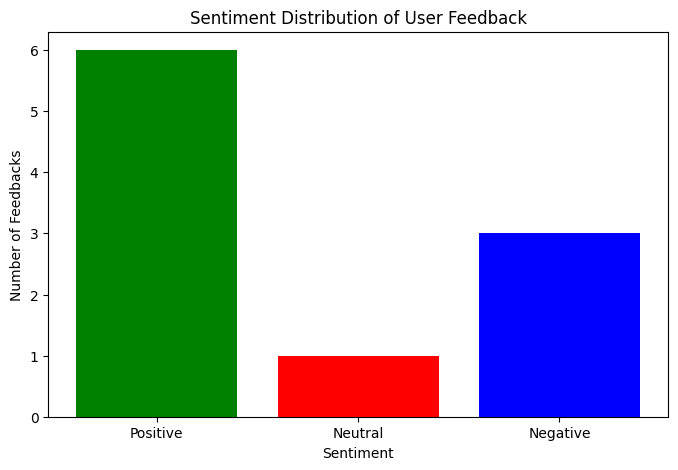

In [8]:
# Visualize sentiment distribution
labels = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of User Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Feedbacks')
plt.show()